## Data Loading
The following notebook is a guide to load image data sets for model training and validation. 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers, regularizers  ### Adding 'regularizers'
from tensorflow.keras.models import Sequential
import pathlib
import zipfile

### Relevant Links:
0. Trial Link just to test linkages: Please try.<br>
https://www.dropbox.com/scl/fi/ryo0gocx5ibsttv0635jg/ls_model_data_two_v2.zip?rlkey=i6fg2du9osvc0h6hpcoul1xa1&dl=0  <br>

1. Link 1 contains Training landslide images from Longxi River（UAV and non-landslide images from DeepGlobe Land Cover Classification Dataset. 
Working on this - resizing to get the zip file much lower, to 1.5G.


Notes per DropBox Requirements:
- Add ?raw=1 to the end of the dropbox link in the full URL link as seen below. 
- replace dropbox.com in link with "dl.dropboxusercontent.com" as seen below. 

In [20]:
# Specify the path to the zip file
dataset_url = "https://dl.dropboxusercontent.com/scl/fi/ryo0gocx5ibsttv0635jg/ls_model_data_two_v2.zip?rlkey=i6fg2du9osvc0h6hpcoul1xa1&dl=0?raw=1"


In [21]:
data_dir = tf.keras.utils.get_file('ls_model_data_two_v2.zip', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

1066207/1066207 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2


In [23]:
folders = [folder for folder in data_dir.glob('*') if folder.is_dir()]
print("Folders in the dataset directory:")
for folder in folders:
    print(folder.name)

Folders in the dataset directory:
landslide
non_landslide


### Review an image:

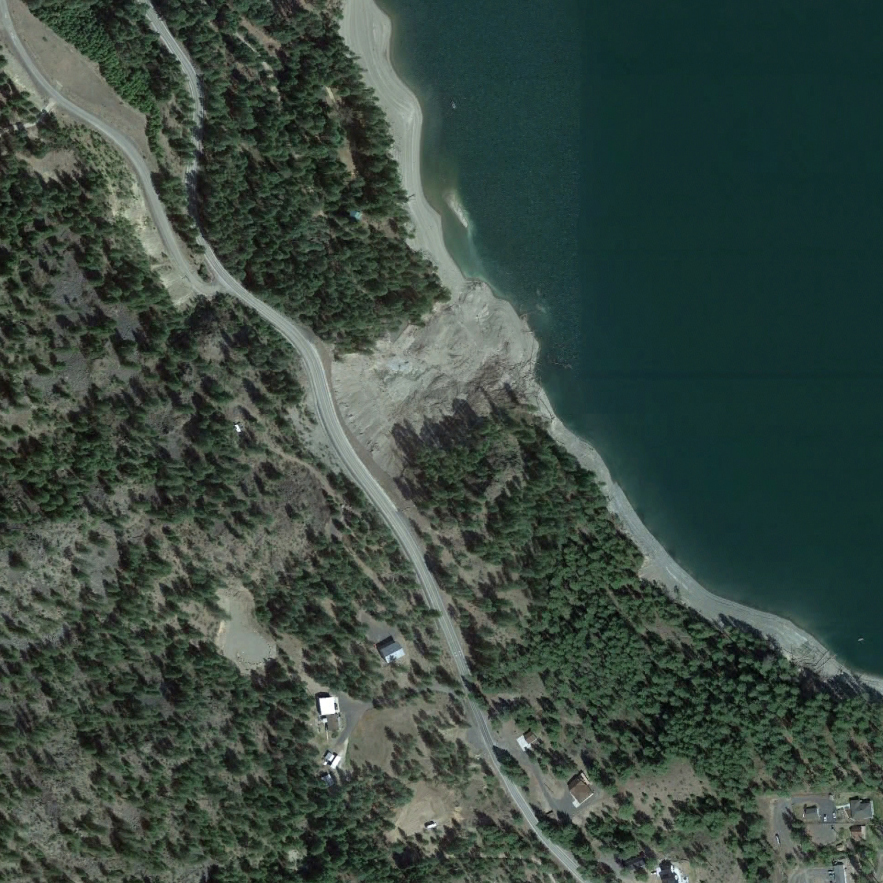

In [37]:
landslide_one = list(data_dir.glob('landslide/*'))
PIL.Image.open(str(landslide_one[0]))

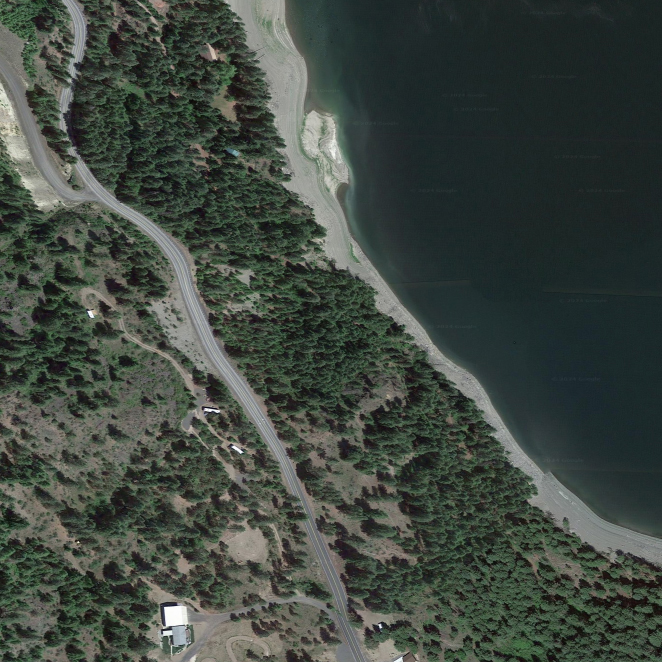

In [35]:
# landslide_one = list(data_dir.glob('landslide/*'))
# PIL.Image.open(str(landslide_one[0]))

non_landslide_img = list(data_dir.glob('non_landslide/*'))
PIL.Image.open(str(non_landslide_img[1]))

### Create the model dataset.

In [40]:
## Set Batch and Image size. 
batch_size = 32
img_height = 300
img_width = 300

In [42]:
## Set Training Set image set. 
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  # validation_split=0.2,
  # subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2 files belonging to 2 classes.


2024-10-27 21:39:09.026419: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30884 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:18:00.0, compute capability: 7.0


In [45]:
## Review class names based on dataset. 
class_names = train_dataset.class_names
print(class_names)

['landslide', 'non_landslide']


In [44]:
## Review sizes of images. 
for images, labels in train_dataset:
    print(images.shape, labels.shape)

(2, 300, 300, 3) (2,)


2024-10-27 21:39:21.219196: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
